## **TrainEmotionDetector**

In [2]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [3]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [4]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [5]:
# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [6]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [7]:
cv2.ocl.setUseOpenCL(False)

In [8]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

C:\Users\sarah\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

C:\Users\sarah\AppData\Local\Temp\ipykernel_3144\3198193097.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
448/448 [==============================] - 322s 716ms/step - loss: 1.7971 - accuracy: 0.2636 - val_loss: 1.6990 - val_accuracy: 0.3380
Epoch 2/50
448/448 [==============================] - 419s 937ms/step - loss: 1.6284 - accuracy: 0.3648 - val_loss: 1.5322 - val_accuracy: 0.4263
Epoch 3/50
448/448 [==============================] - 234s 523ms/step - loss: 1.5137 - accuracy: 0.4201 - val_loss: 1.4492 - val_accuracy: 0.4491
Epoch 4/50
448/448 [==============================] - 207s 462ms/step - loss: 1.4422 - accuracy: 0.4497 - val_loss: 1.3909 - val_accuracy: 0.4689
Epoch 5/50
448/448 [==============================] - 213s 476ms/step - loss: 1.3792 - accuracy: 0.4764 - val_loss: 1.3430 - val_accuracy: 0.4873
Epoch 6/50
448/448 [==============================] - 186s 414ms/step - loss: 1.3267 - accuracy: 0.4942 - val_loss: 1.2898 - val_accuracy: 0.5092
Epoch 7/50
448/448 [==============================] - 388s 866ms/step - loss: 1.2932 - accuracy: 0.5108 - val_loss: 1.2650 -

In [10]:
# history from 10 epochs that were ran by a model (loss, accuracy, validation loss, validation accuracy)
emotion_model_info.history

{'loss': [1.7970688343048096,
  1.628352165222168,
  1.5137122869491577,
  1.4422067403793335,
  1.3791851997375488,
  1.3267306089401245,
  1.2931774854660034,
  1.2528594732284546,
  1.2228360176086426,
  1.1898516416549683,
  1.1690690517425537,
  1.1415547132492065,
  1.114912986755371,
  1.092185139656067,
  1.06826913356781,
  1.0489305257797241,
  1.0290191173553467,
  1.00212824344635,
  0.9810900688171387,
  0.9614143371582031,
  0.9379279613494873,
  0.9170838594436646,
  0.8951014876365662,
  0.8734738826751709,
  0.8468305468559265,
  0.8244253993034363,
  0.7988300323486328,
  0.7776807546615601,
  0.7597525119781494,
  0.7317274212837219,
  0.7188676595687866,
  0.6991111040115356,
  0.67887282371521,
  0.6600795388221741,
  0.6352993249893188,
  0.6148524284362793,
  0.5902706980705261,
  0.5758898258209229,
  0.5513865351676941,
  0.5430536866188049,
  0.5201180577278137,
  0.5064505338668823,
  0.490845650434494,
  0.4720563292503357,
  0.45876508951187134,
  0.4436425

In [11]:
# we get the dictionary 'history'
emotion_model_info.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy with epochs')

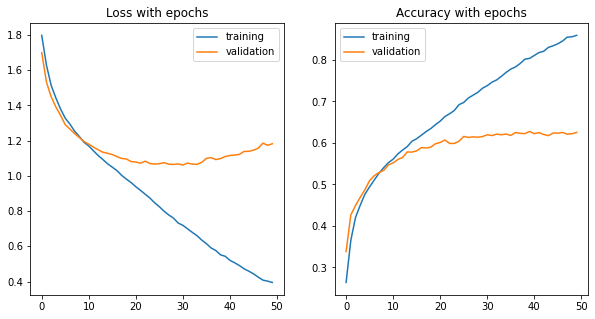

In [12]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].plot(emotion_model_info.history['loss'],label='training')
ax[0].plot(emotion_model_info.history['val_loss'],label='validation')
ax[0].legend()
ax[0].set_title('Loss with epochs')

ax[1].plot(emotion_model_info.history['accuracy'],label='training')
ax[1].plot(emotion_model_info.history['val_accuracy'],label='validation')
ax[1].legend()
ax[1].set_title('Accuracy with epochs')

In [13]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

In [14]:
# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

# **TestEmotionDetector**

In [15]:
import cv2
import numpy as np
from keras.models import model_from_json

In [16]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [17]:
# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [18]:
# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [20]:
# start the webcam feed
#cap = cv2.VideoCapture(0)

# pass here your video path
cap = cv2.VideoCapture("pexels-gabby-k-5273028.mp4")

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 33ms/step


KeyboardInterrupt: 

# **EvaluateEmotionDetector**

In [21]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [22]:
# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [23]:
# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [24]:
# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

In [25]:
# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [26]:
# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

C:\Users\sarah\AppData\Local\Temp\ipykernel_3144\3003485560.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[ 92  10 111 237 176 206 126]
 [  8   1  15  29  24  23  11]
 [111  23 138 253 181 208 110]
 [213   9 221 486 319 326 200]
 [125  11 163 325 211 237 161]
 [133  20 154 329 236 239 136]
 [105  12 113 233 135 142  91]]


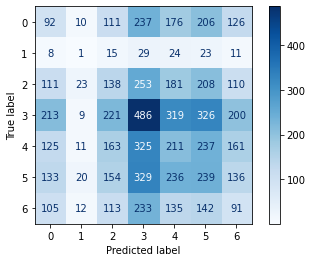

In [27]:
# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [28]:
# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.12      0.10      0.11       958
           1       0.01      0.01      0.01       111
           2       0.15      0.13      0.14      1024
           3       0.26      0.27      0.27      1774
           4       0.16      0.17      0.17      1233
           5       0.17      0.19      0.18      1247
           6       0.11      0.11      0.11       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178

